<b> Functions <b>

In [32]:
from qutip import *
import pylab as py
import numpy as np
import matplotlib.pyplot as plt


def heaviside(x):
    if x >= 0 :
        return 1
    if x < 0 :
        return 0
    
def nega(rho, subsys):
    
    #create mask which counts the number of possible subsystems
    x = [0 for i in rho.dims[0]]
   
    #assigns a 1 in the position of the subsystem for which we want to compute the negativity
    x[subsys] = 1
        
    #takes partial transpose with respect to subsys x
    rho_pt = partial_transpose(rho, x)
    
    #finds eivenvalues of pt matrix
    eig = rho_pt.eigenenergies()
    
    #finds abs value of the eigenvalues
    abs_eig = abs(eig)
    
    negat = 0 #initialize value of negativity
    
    #takes the difference 
    diff = (abs_eig - eig)
    
    
    #computes negativity
    for el in diff:
        negat += el
    
    return negat

<b> Parameters <b>

In [62]:
#INPUT TUNABLE PARAMETER:
# coupling switching frequency = 'fs'
# frequency of cavity photons = 'ph'
# photon's dissipation rates = 'diss'

tune = 'ph'



#time settings
ti = 0 #initial time
tf = 10**(-9)*40 #final time
steps = 6001 #number of steps
tau_list = np.linspace(ti,tf,steps) # vector of time steps

if tune == 'ph' or 'fs':
    # CYCLES FOR FREQUENCY SCAN
    cycles = 101 # number of variations of parameters
    pi = 3/4
    pf = 5/4
    par_list = np.linspace(pi,pf,cycles)
    par_range = [0 for i in range(cycles)]

if tune == 'diss':
    # CYCLES FOR DISSIPATION SCAN
    cycles = 21 # number of variations of parameters
    pi = 1000
    pf = 1
    par_list = np.linspace(pi,pf,cycles)
    par_range = [0 for i in range(cycles)]

print(par_list)


#initialize entanglement measures vectors
neg = np.zeros([cycles, steps]) #negativity

mut = np.zeros([cycles, steps]) #mutual information

conc = np.zeros([cycles, steps]) #concurrence




[0.75  0.755 0.76  0.765 0.77  0.775 0.78  0.785 0.79  0.795 0.8   0.805
 0.81  0.815 0.82  0.825 0.83  0.835 0.84  0.845 0.85  0.855 0.86  0.865
 0.87  0.875 0.88  0.885 0.89  0.895 0.9   0.905 0.91  0.915 0.92  0.925
 0.93  0.935 0.94  0.945 0.95  0.955 0.96  0.965 0.97  0.975 0.98  0.985
 0.99  0.995 1.    1.005 1.01  1.015 1.02  1.025 1.03  1.035 1.04  1.045
 1.05  1.055 1.06  1.065 1.07  1.075 1.08  1.085 1.09  1.095 1.1   1.105
 1.11  1.115 1.12  1.125 1.13  1.135 1.14  1.145 1.15  1.155 1.16  1.165
 1.17  1.175 1.18  1.185 1.19  1.195 1.2   1.205 1.21  1.215 1.22  1.225
 1.23  1.235 1.24  1.245 1.25 ]


<b> Numerical solution <b>

In [34]:
   
for j in range(0, cycles):

    
    #TUNE FREQUENCY OF PHOTONS
    if tune == 'ph':
        
        #transition frequency
        wc = 10**(9)*2*np.pi*5.439*par_list[j]  # frequency of the cavity photons
        wa = 10**(9)*2*np.pi*5.439  # transition frequency of the qubits
        wd = 2*wa #frequency of switching of coupling

        par_range[j] = wc

        N = 2      # number of cavity fock states (N-1 photons inn the cavity)
        n_th_a = 0.0           # temperature in frequency units
        g = 10**(6)*2*np.pi*300 # coupling strength


        #dissipation
        kappa = 1.6*2*np.pi*10**(6)     # cavity dissipation rate
        gamma1 = 7.6*2*np.pi*10**(3)     # atom 1 dissipation rate
        gamma2 = 7.6*2*np.pi*10**(3)     # atom 2 dissipation rate
        gamma_phi1 = 3*2*np.pi*10**(3)     # atom 1 dephasing rate
        gamma_phi2 = 3*2*np.pi*10**(3)     # atom 2 dephasing rate
    
    
#     #TUNE FREQUENCY OF SWITCHING
    if tune == 'fs':
    
        #transition frequency
        wc = 10**(9)*2*np.pi*4.343  # frequency of the cavity photons
        wa = 10**(9)*2*np.pi*5.439  # transition frequency of the qubits
        wd = 2*wa*par_list[j] #frequency of switching of coupling

        par_range[j] = wd

        N = 2      # number of cavity fock states (N-1 photons inn the cavity)
        n_th_a = 0.0           # temperature in frequency units
        g = 10**(6)*2*np.pi*300 # coupling strength


        #dissipation
        kappa = 1.6*2*np.pi*10**(6)     # cavity dissipation rate
        gamma1 = 7.6*2*np.pi*10**(3)     # atom 1 dissipation rate
        gamma2 = 7.6*2*np.pi*10**(3)     # atom 2 dissipation rate
        gamma_phi1 = 3*2*np.pi*10**(3)     # atom 1 dephasing rate
        gamma_phi2 = 3*2*np.pi*10**(3)     # atom 2 dephasing rate


#     #TUNE DISSIPATION
    if tune == 'diss':
    
        #transition frequency
        wc = 10**(9)*2*np.pi*4.343  # frequency of the cavity photons
        wa = 10**(9)*2*np.pi*5.439  # transition frequency of the qubits
        wd = 2*wa #frequency of switching of coupling


        N = 2      # number of cavity fock states (N-1 photons inn the cavity)
        n_th_a = 0.0           # temperature in frequency units
        g = 10**(6)*2*np.pi*300 # coupling strength


        #dissipation
        kappa = 1.6*2*np.pi*10**(6)*par_list[j]     # cavity dissipation rate
        gamma1 = 7.6*2*np.pi*10**(3)     # atom 1 dissipation rate
        gamma2 = 7.6*2*np.pi*10**(3)     # atom 2 dissipation rate
        gamma_phi1 = 3*2*np.pi*10**(3)     # atom 1 dephasing rate
        gamma_phi2 = 3*2*np.pi*10**(3)     # atom 2 dephasing rate
    
    
        par_range[j] = kappa



    # intial state (ground state)
    psi0 = tensor(basis(N,0), basis(2,0), basis(2,0))    # start with 0 excited atom and 0 photons



    # density matrix
    rho0 = ket2dm(psi0) #turns ket into a density matrix




    # operators
    a  = tensor(destroy(N), qeye(2), qeye(2)) #destroy cavity photon
    sm1 = tensor(qeye(N), destroy(2), qeye(2)) #destroy atom1 excitation
    sm2 = tensor(qeye(N), qeye(2), destroy(2)) #destroy atom2 excitation


    #list of collapse operator (dissipation ops) for separate baths (for Lindblad's equation)    
    c_op_list = []

    rate = kappa #photon dissipation
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * a) 


    rate = gamma1 #atom1 dissipation
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm1)

    rate = gamma2 #atom2 dissipation
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm2)

    rate = gamma_phi1 #atom1 dephasing
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * ((sm1.dag()*sm1 - qeye(1))/2) )

    rate = gamma_phi2 #atom2 dephasing
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * ((sm2.dag()*sm2 - qeye(1))/2) )




    # Rabi model Hamiltonian for two atoms and a cavity mode for time dependent coupling

    def H1_coeff(t,args):
        coeff = g*heaviside(np.cos((wd)*t))
        return coeff

    H0 = wc*a.dag()*a + wa*sm1.dag()*sm1 + wa*sm2.dag()*sm2

    H1 = (a.dag()*sm1 + a*sm1.dag() + a.dag()*sm2 + a*sm2.dag() + a*sm1 + a.dag()*sm1.dag() + a*sm2 + a.dag()*sm2.dag())


    H = [H0,[H1,H1_coeff]]





    #solve master equation
#    output = mesolve(H, rho0, tau_list, c_op_list ,[a.dag() * a, sm1.dag() * sm1, sm2.dag() * sm2])  #stores expectation values of number of phontons, excitation of atom 1 and 2 

    result = mesolve(H, rho0, tau_list, c_op_list)  #stores density matrix operator changing in time


    # plot excitation probabilities of photons and atoms
#     plt.plot(tau_list, output.expect[0], label="Cavity")
#     plt.plot(tau_list, output.expect[1], label="Atom 1 excited state")
#     plt.plot(tau_list, output.expect[2], label="Atom 2 excited state")
#     plt.legend()
#     plt.xlabel('Time')
#     plt.ylabel('Occupation probability')
#     plt.title('Vacuum Rabi oscillations');
#     plt.show()



    x = [1,2] # selects the system to NOT trace over (0=photons, 1=atom1, 2=atom2)

    for i in range(steps):
        states = result.states[i]*result.states[i].dag() # creates density matrix at each time 

        rhoqub = states.ptrace(x) # traces over the photonic degrees of freedom to obtain the density matrix of the qubits

        conc[j][i] = concurrence(rhoqub) # computes concurrence between qubits 
        
        #print(conc)

        #mut[j][i] = entropy_mutual(rhoqub,0,1) #computes mutual information between the qubits

        #neg[j][i] = nega(states, 1) #computes negativity between a qubit and the rest of the system

        neg[j][i] = nega(rhoqub, 0) #computes negativity between a qubit and the rest of the system
    
    print(j)


#SAVE DATA
if tune == 'fs':
    np.save('data/conc_2q_fs', conc)
    np.save('data/neg_2q_fs', neg)

if tune == 'ph':
    np.save('data/conc_2q_ph', conc)
    np.save('data/neg_2q_ph', neg)

if tune == 'diss':
    np.save('data/conc_2q_diss', conc)
    np.save('data/neg_2q_diss', neg)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


<b> Plot dependence on parameters

[25630683664.31233, 25801554888.741077, 25972426113.169827, 26143297337.598576, 26314168562.027325, 26485039786.456074, 26655911010.884823, 26826782235.313572, 26997653459.74232, 27168524684.17107, 27339395908.59982, 27510267133.02857, 27681138357.457317, 27852009581.886063, 28022880806.314816, 28193752030.74356, 28364623255.17231, 28535494479.60106, 28706365704.029808, 28877236928.458557, 29048108152.887306, 29218979377.316055, 29389850601.744804, 29560721826.173553, 29731593050.602303, 29902464275.03105, 30073335499.459797, 30244206723.888546, 30415077948.317295, 30585949172.746044, 30756820397.174793, 30927691621.603542, 31098562846.03229, 31269434070.46104, 31440305294.88979, 31611176519.31854, 31782047743.747284, 31952918968.176037, 32123790192.604782, 32294661417.033535, 32465532641.46228, 32636403865.891033, 32807275090.31978, 32978146314.748528, 33149017539.177277, 33319888763.606026, 33490759988.034775, 33661631212.463524, 33832502436.892273, 34003373661.321022, 34174244885.74

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


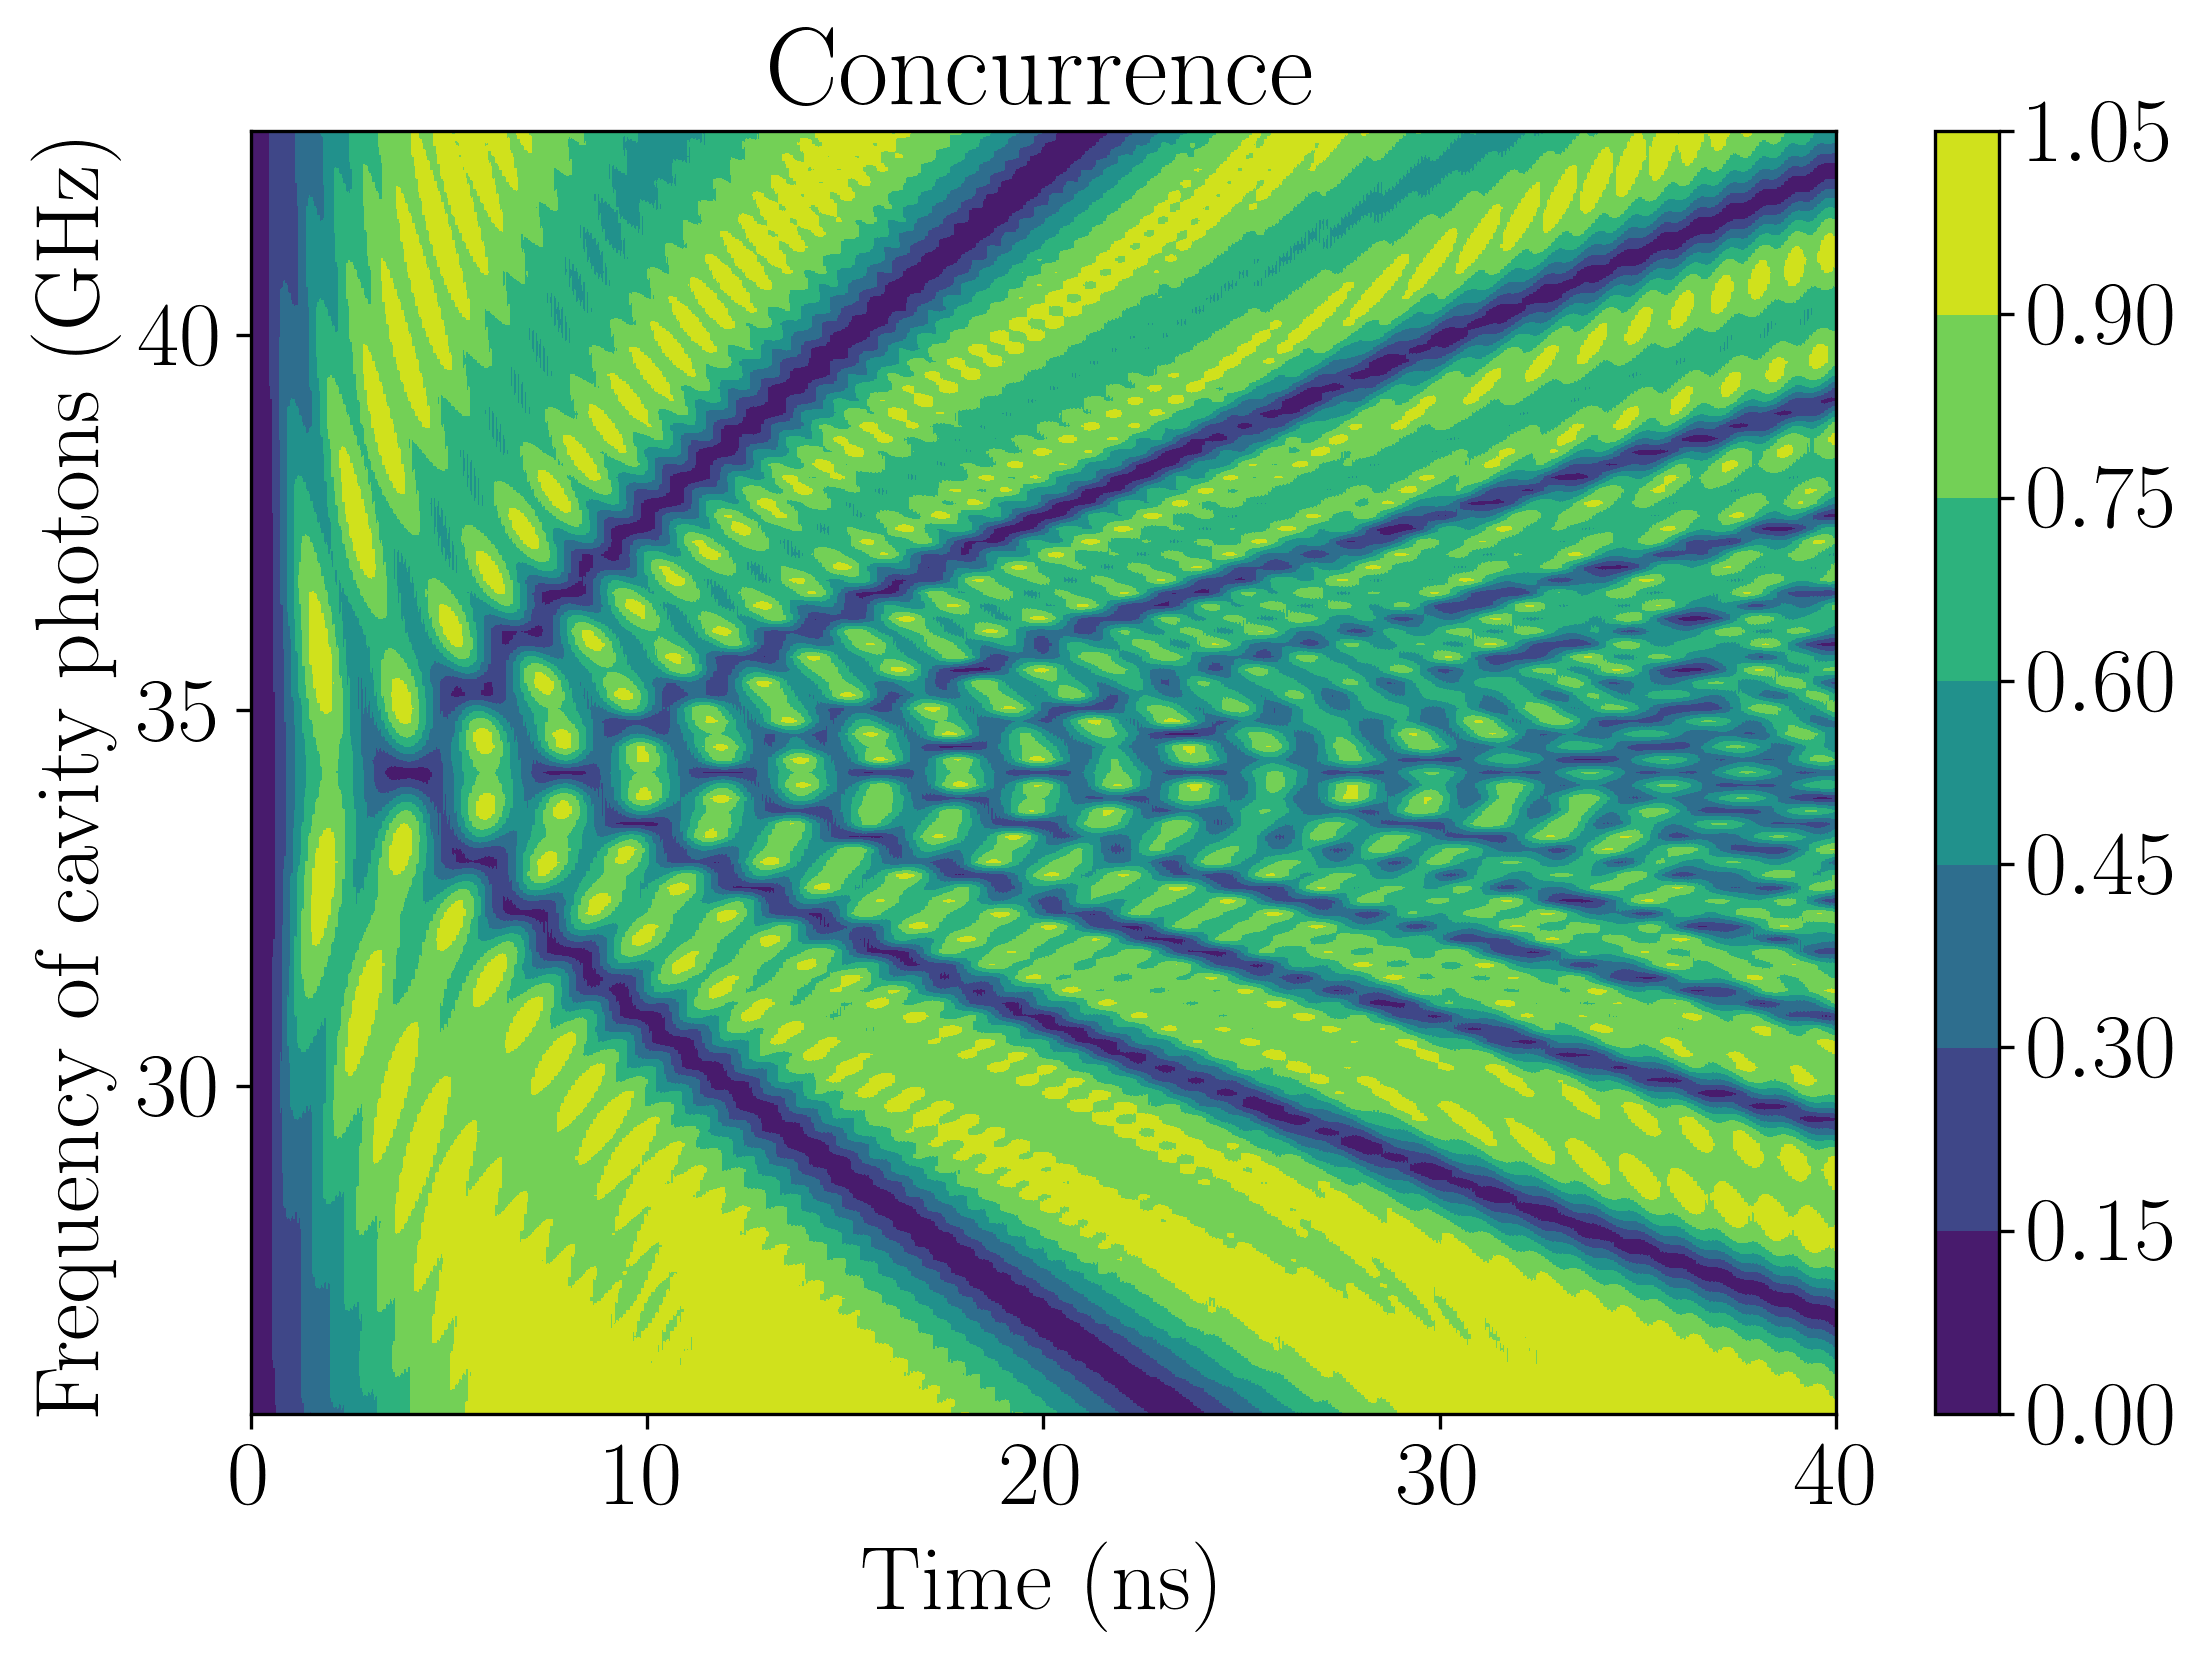

/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


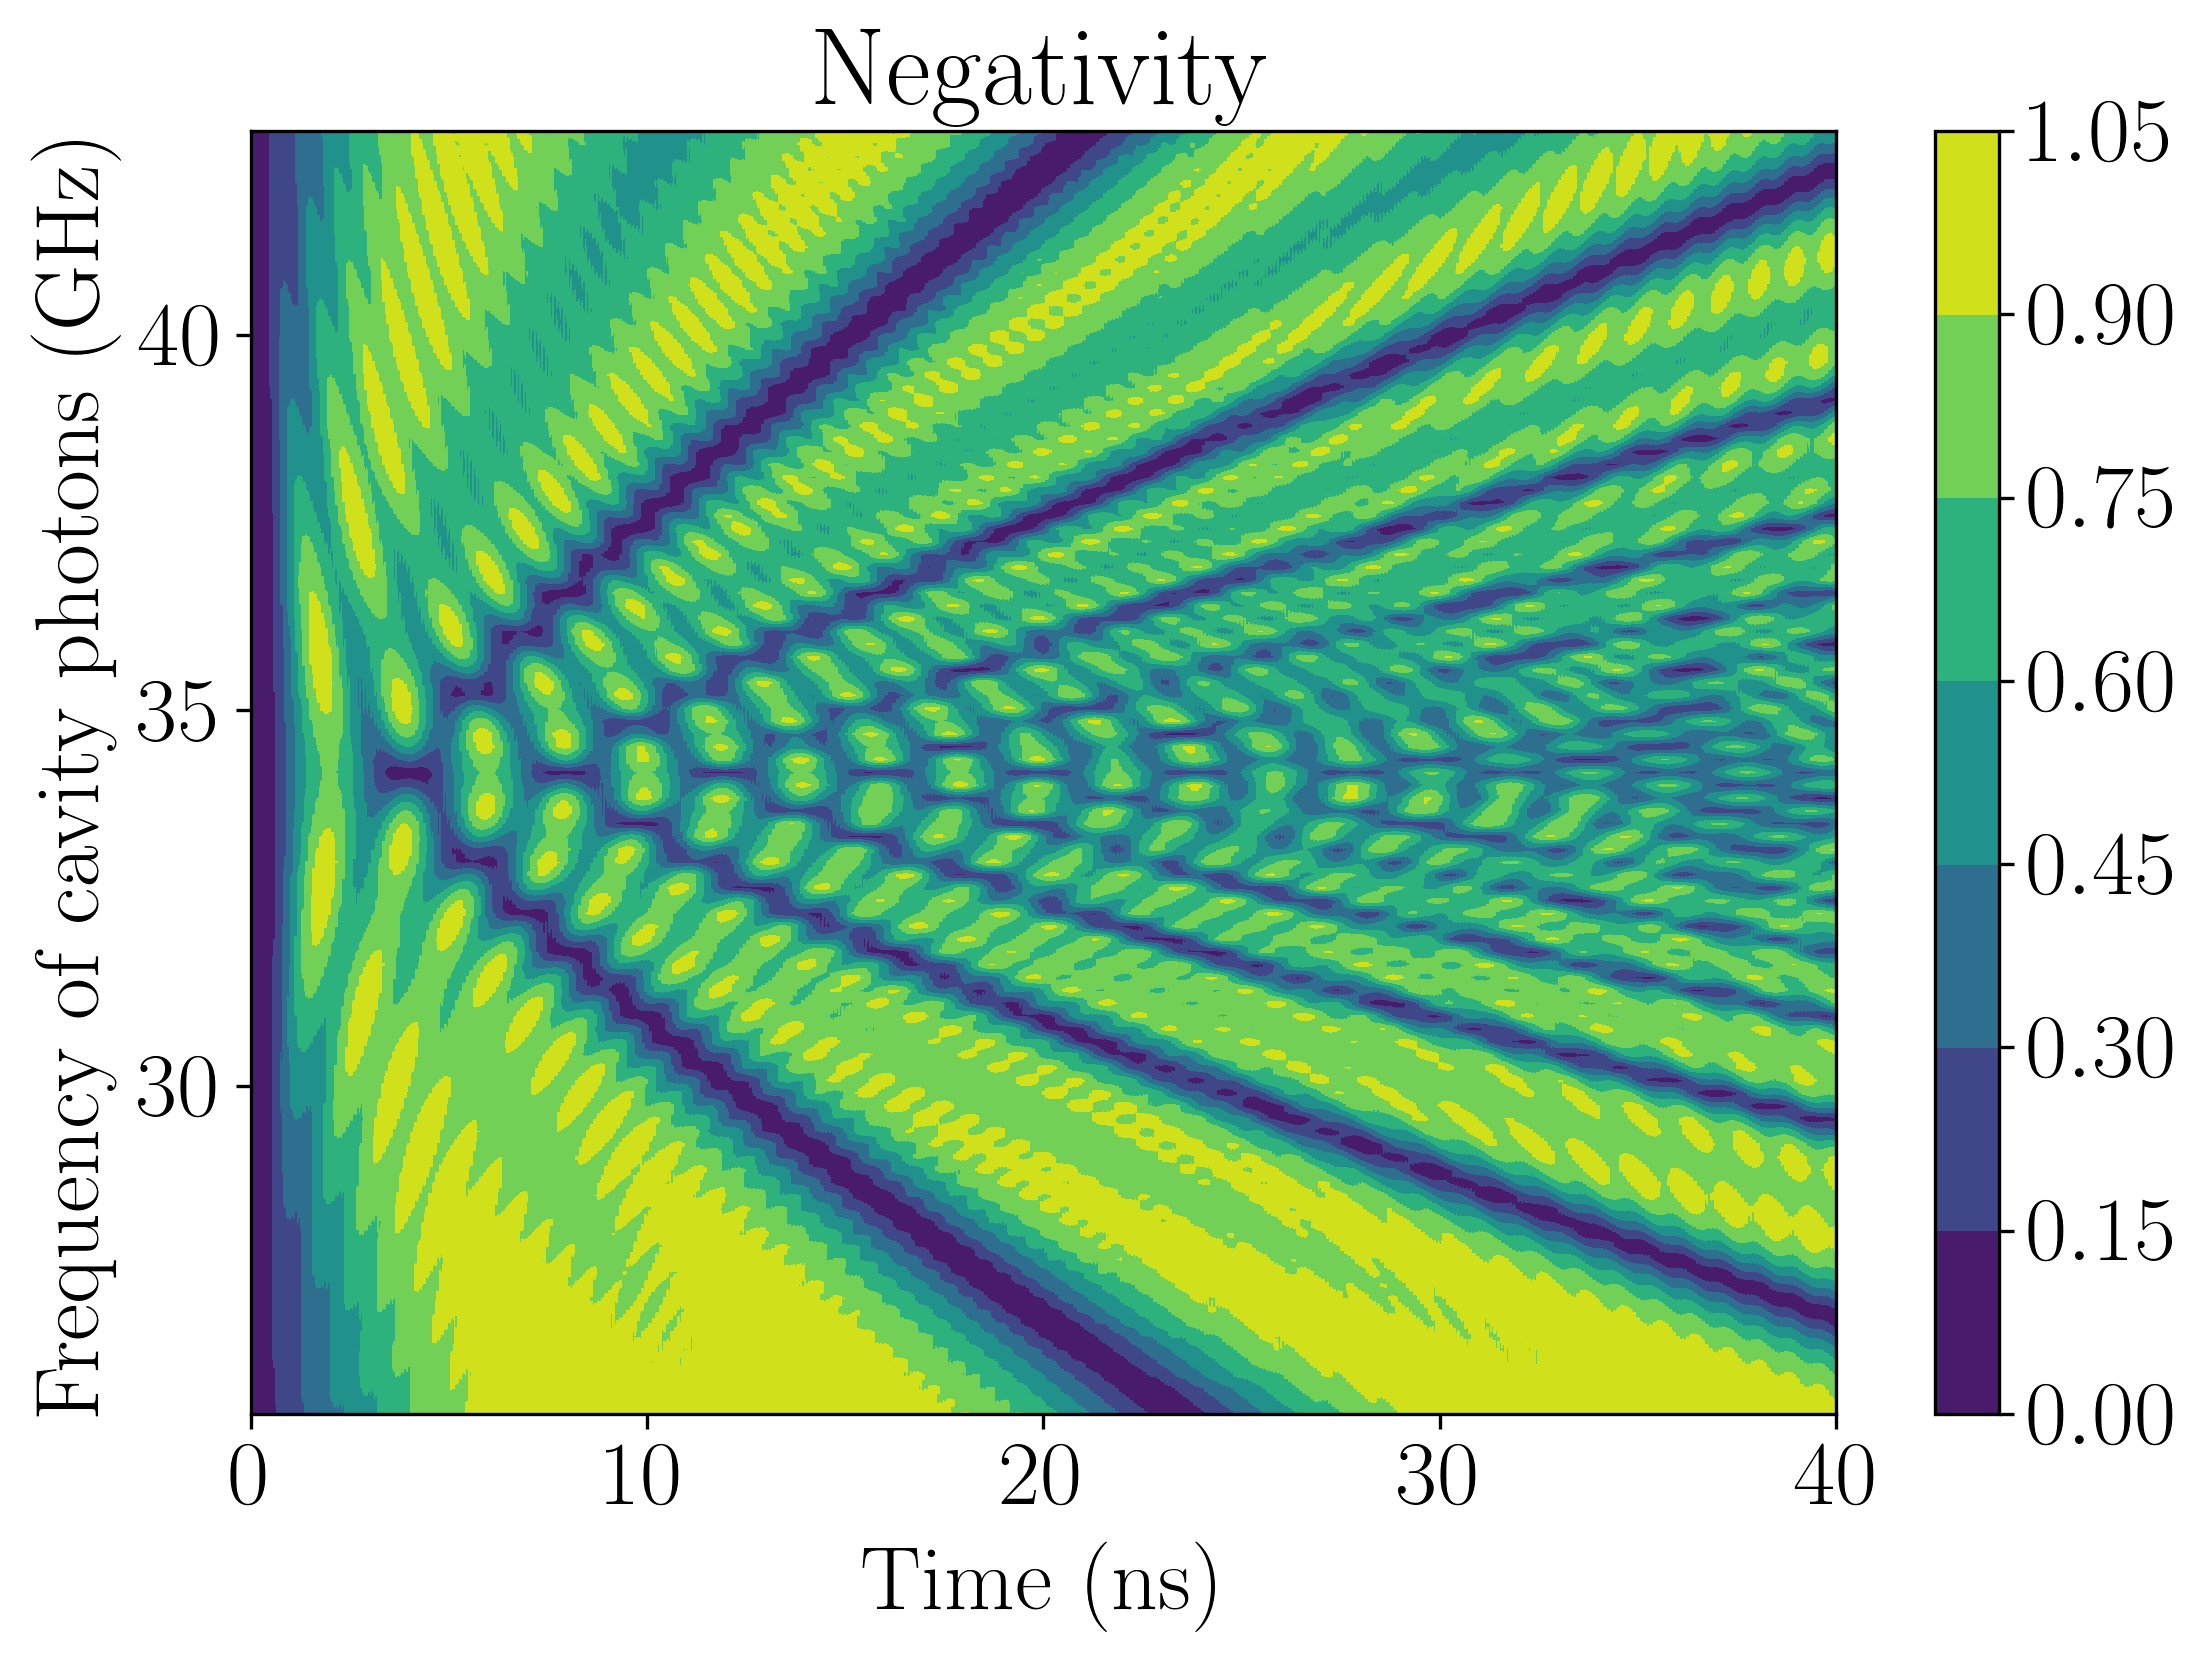

In [63]:
#changes plot parameters
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'figure.autolayout': True})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

for j in range(0, cycles):
    if tune == 'fs':
        wd = 2*wa*par_list[j] #frequency of switching of coupling
        par_range[j] = wd
    if tune == 'ph':
        wc = 10**(9)*2*np.pi*5.439*par_list[j]
        par_range[j] = wc
    if tune == 'diss':
        kappa = 1.6*2*np.pi*10**(6)*par_list[j]     # cavity dissipation rate
        par_range[j] = kappa

    
print(par_range)    
    

#LOAD DATA
if tune == 'fs':
    c = np.load('data/conc_2q_fs.npy')
    n = np.load('data/neg_2q_fs.npy')
if tune == 'ph':
    c = np.load('data/conc_2q_ph.npy')
    n = np.load('data/neg_2q_ph.npy')
if tune == 'diss':
    c = np.load('data/conc_2q_diss.npy')
    n = np.load('data/neg_2q_diss.npy')

par_range = [x*10**-9 for x in par_range] # normalizes freq.


# plot time evolution of concurrence (x = time) for different values of wc (y = wc)

if tune == 'fs':
    plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    plt.contourf(tau_list*10**9,par_range,c)
    plt.xlabel(r' Time (ns)', fontsize = 22)
    plt.ylabel(r'Frequency of coupling switching (GHz)', fontsize = 22)
    plt.colorbar()  # draw colorbar
    plt.title('Concurrence')
    plt.savefig('concurrence_2q_fs.eps', dpi = 300)
    plt.show()


    # plot time evolution of negativity (x = time) for different values of wc (y = wc)

    plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    plt.contourf(tau_list*10**9,par_range,n)
    plt.xlabel(r' Time (ns)', fontsize = 22)
    plt.ylabel(r'Frequency of coupling switching (GHz)', fontsize = 22)
    plt.title('Negativity')
    plt.colorbar()  # draw colorbar
    plt.savefig('negativity_2q_fs.eps', dpi = 300)
    plt.show()

if tune == 'ph':
    plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    plt.contourf(tau_list*10**9,par_range,c)
    plt.xlabel(r' Time (ns)', fontsize = 22)
    plt.ylabel(r'Frequency of cavity photons (GHz)', fontsize = 22)
    plt.colorbar()  # draw colorbar
    plt.title('Concurrence')
    plt.savefig('concurrence_2q_ph.eps', dpi = 300)
    plt.show()


    # plot time evolution of negativity (x = time) for different values of wc (y = wc)

    plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    plt.contourf(tau_list*10**9,par_range,n)
    plt.xlabel(r' Time (ns)', fontsize = 22)
    plt.ylabel(r'Frequency of cavity photons (GHz)', fontsize = 22)
    plt.title('Negativity')
    plt.colorbar()  # draw colorbar
    plt.savefig('negativity_2q_ph.eps', dpi = 300)
    plt.show()


if tune == 'diss':
    plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    plt.contourf(tau_list*10**9,par_range,c)
    plt.xlabel(r' Time (ns)', fontsize = 22)
    plt.ylabel(r'Photons\' dissipation rate (GHz)', fontsize = 22)
    plt.colorbar()  # draw colorbar
    plt.title('Concurrence')
    plt.savefig('concurrence_2q_diss.eps', dpi = 300)
    plt.show()


    # plot time evolution of negativity (x = time) for different values of wc (y = wc)

    plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
    plt.contourf(tau_list*10**9,par_range,n)
    plt.xlabel(r' Time (ns)', fontsize = 22)
    plt.ylabel(r'Photons\' dissipation rate (GHz)', fontsize = 22)
    plt.title('Negativity')
    plt.colorbar()  # draw colorbar
    plt.savefig('negativity_2q_diss.eps', dpi = 300)
    plt.show()



# plot time evolution of negativity (x = time) for different values of wd (y = wd)


# plt.figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
# plt.contourf(tau_list*10**12,par_range,n)
# plt.xlabel(r' Time (ps)', fontsize = 22)
# plt.ylabel(r' Frequency of coupling switching (GHz)', fontsize = 22)
# plt.colorbar()  # draw colorbar
# plt.title('Negativity')
# plt.savefig('negativity_3q_fs.eps', dpi = 300)
# plt.show()